In [1]:
import pandas as pd
import numpy as np

print("Step 1: Libraries imported. Loading data...")

file_path = 'kidney_disease_dataset.csv'

# 'try...except' is a way to handle errors.
# If the file isn't found, it will print a friendly error message
try:
    data = pd.read_csv(file_path)
    
    print("Success! Data loaded. Here are the first 5 rows:")
    print(data.head()) 
    
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the file is in the same folder as your Jupyter Notebook.")

Step 1: Libraries imported. Loading data...
Success! Data loaded. Here are the first 5 rows:
   Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                  54                     167                      1.023   
1                  42                     127                      1.023   
2                  38                     148                      1.016   
3                   7                      98                      1.017   
4                  67                     174                      1.015   

   Albumin in urine  Sugar in urine Red blood cells in urine  \
0                 1               4                   normal   
1                 3               2                   normal   
2                 0               0                 abnormal   
3                 4               0                 abnormal   
4                 1               1                   normal   

  Pus cells in urine Pus cell clumps in urine Bacteria in urine  

In [2]:
# Initial Data Exploration ---

print("Step 2: Data Exploration")
print("--------------------------\n")

print("--- data.info() ---")
print("This shows data types and non-null counts:")
data.info()


Step 2: Data Exploration
--------------------------

--- data.info() ---
This shows data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  object 
 6   Pus cells in urine                           20538 non-null  object 
 7   Pus cell clumps in urine                     20538 non-null  object 
 8   Bacteria in urine             

In [3]:
print("\n\n--- data.isnull().sum() ---")

print("This shows the total count of missing values for each column:")

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

print("\n\n--- data.describe(include='object') ---")
print("This shows unique values and counts for TEXT columns (to find typos):")
display(data.describe(include='object'))



--- data.isnull().sum() ---
This shows the total count of missing values for each column:
Series([], dtype: int64)


--- data.describe(include='object') ---
This shows unique values and counts for TEXT columns (to find typos):


,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Hypertension (yes/no),Diabetes mellitus (yes/no),Coronary artery disease (yes/no),Appetite (good/poor),Pedal edema (yes/no),Anemia (yes/no),Family history of chronic kidney disease,Smoking status,Physical activity level,Urinary sediment microscopy results,Target
count,20538,20538,20538,20538,20538,20538,20538,20538,20538,20538,20538,20538,20538,20538,20538
unique,2,2,2,2,2,2,2,2,2,2,2,2,3,2,5
top,normal,abnormal,present,not present,yes,no,yes,good,yes,yes,no,no,low,abnormal,No_Disease
freq,10272,10274,10298,10353,10311,10300,10303,10384,10287,10402,10323,10293,6869,10302,16432


In [4]:
# Setup Plotting & Analyze 'Target' Variable ---

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set a style for our plots (this one looks modern)
sns.set_style('darkgrid')

print("Step 3: Exploratory Data Analysis (EDA)")
print("----------------------------------------\n")



Step 3: Exploratory Data Analysis (EDA)
----------------------------------------



Analyzing our 'Target' variable:


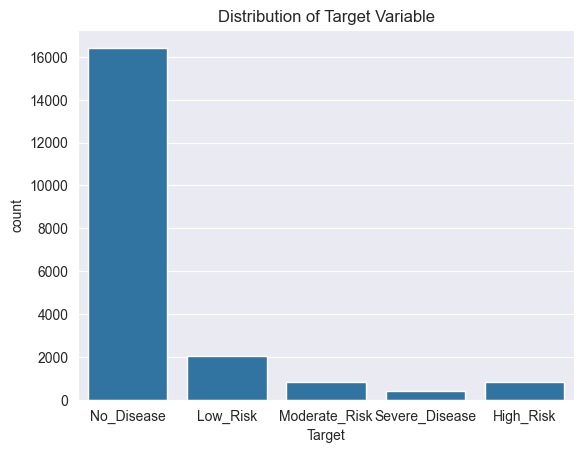


Exact counts for each Target category:
Target
No_Disease        16432
Low_Risk           2054
Moderate_Risk       821
High_Risk           821
Severe_Disease      410
Name: count, dtype: int64


In [5]:
# --- Chart 1: Target Variable Distribution ---
print("Analyzing our 'Target' variable:")

# Create a 'countplot'
# This counts the number of times each unique value appears in the 'Target' column
sns.countplot(x='Target', data=data)

plt.title('Distribution of Target Variable')

plt.show()

# Also print the exact numbers
print("\nExact counts for each Target category:")
print(data['Target'].value_counts())

Step 4: Analyzing Numerical Features vs. Target
------------------------------------------------



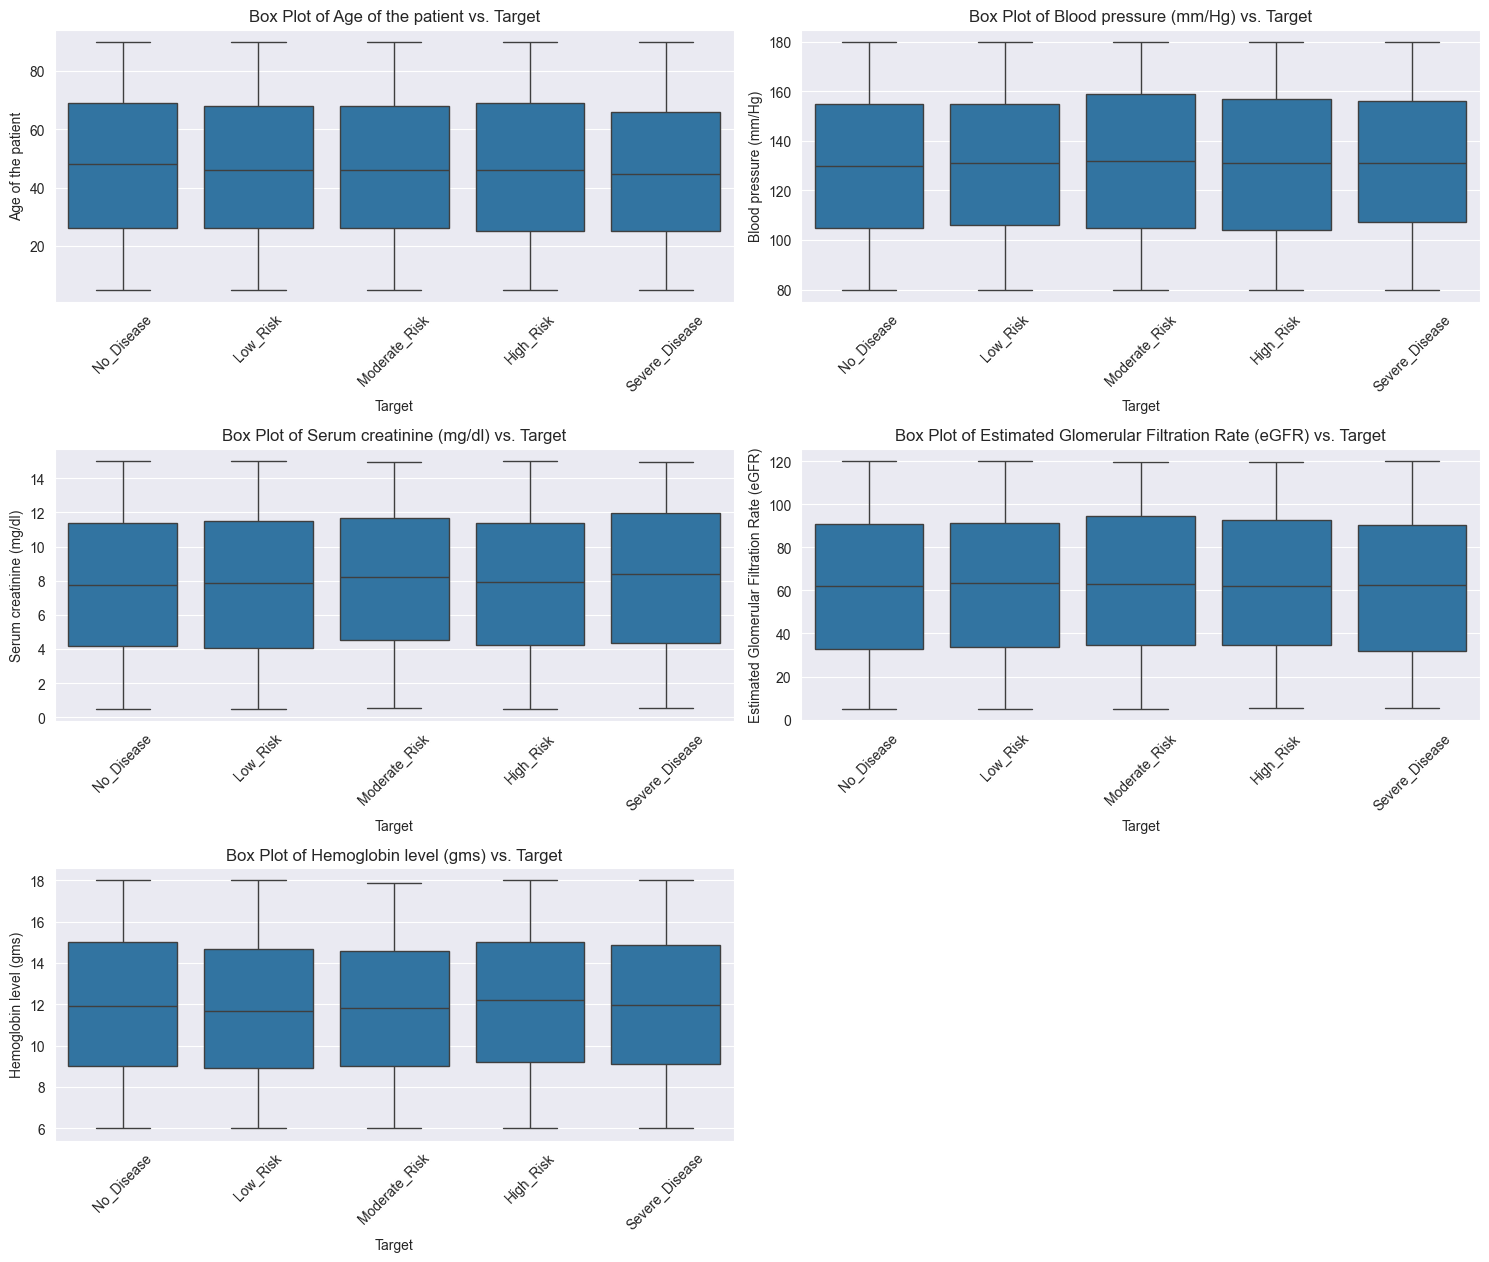

In [6]:
# Numerical Features vs. Target (Box Plots) ---

print("Step 4: Analyzing Numerical Features vs. Target")
print("------------------------------------------------\n")

# Let's define a list of important columns to check
numerical_features = [
    'Age of the patient', 
    'Blood pressure (mm/Hg)', 
    'Serum creatinine (mg/dl)', 
    'Estimated Glomerular Filtration Rate (eGFR)',
    'Hemoglobin level (gms)'
]

plt.figure(figsize=(15, 20))

target_order = ['No_Disease', 'Low_Risk', 'Moderate_Risk', 'High_Risk', 'Severe_Disease']

# Loop through each feature and create a plot
# 'enumerate' gives us an index 'i' (0, 1, 2, 3...) and the column name 'col'
for i, col in enumerate(numerical_features):
    
    # (len(numerical_features), 2, i + 1) means "(5 rows, 2 columns, plot number i+1)"
    # We use 2 columns to make it look nice
    plt.subplot(len(numerical_features), 2, i + 1)
    
    # This is the main plot command
    sns.boxplot(x='Target', y=col, data=data, order=target_order)
    
    plt.title(f'Box Plot of {col} vs. Target')
    
    plt.xticks(rotation=45)

# This makes sure the plots don't overlap
plt.tight_layout()

plt.show()

Step 5: Analyzing Categorical Features vs. Target
--------------------------------------------------



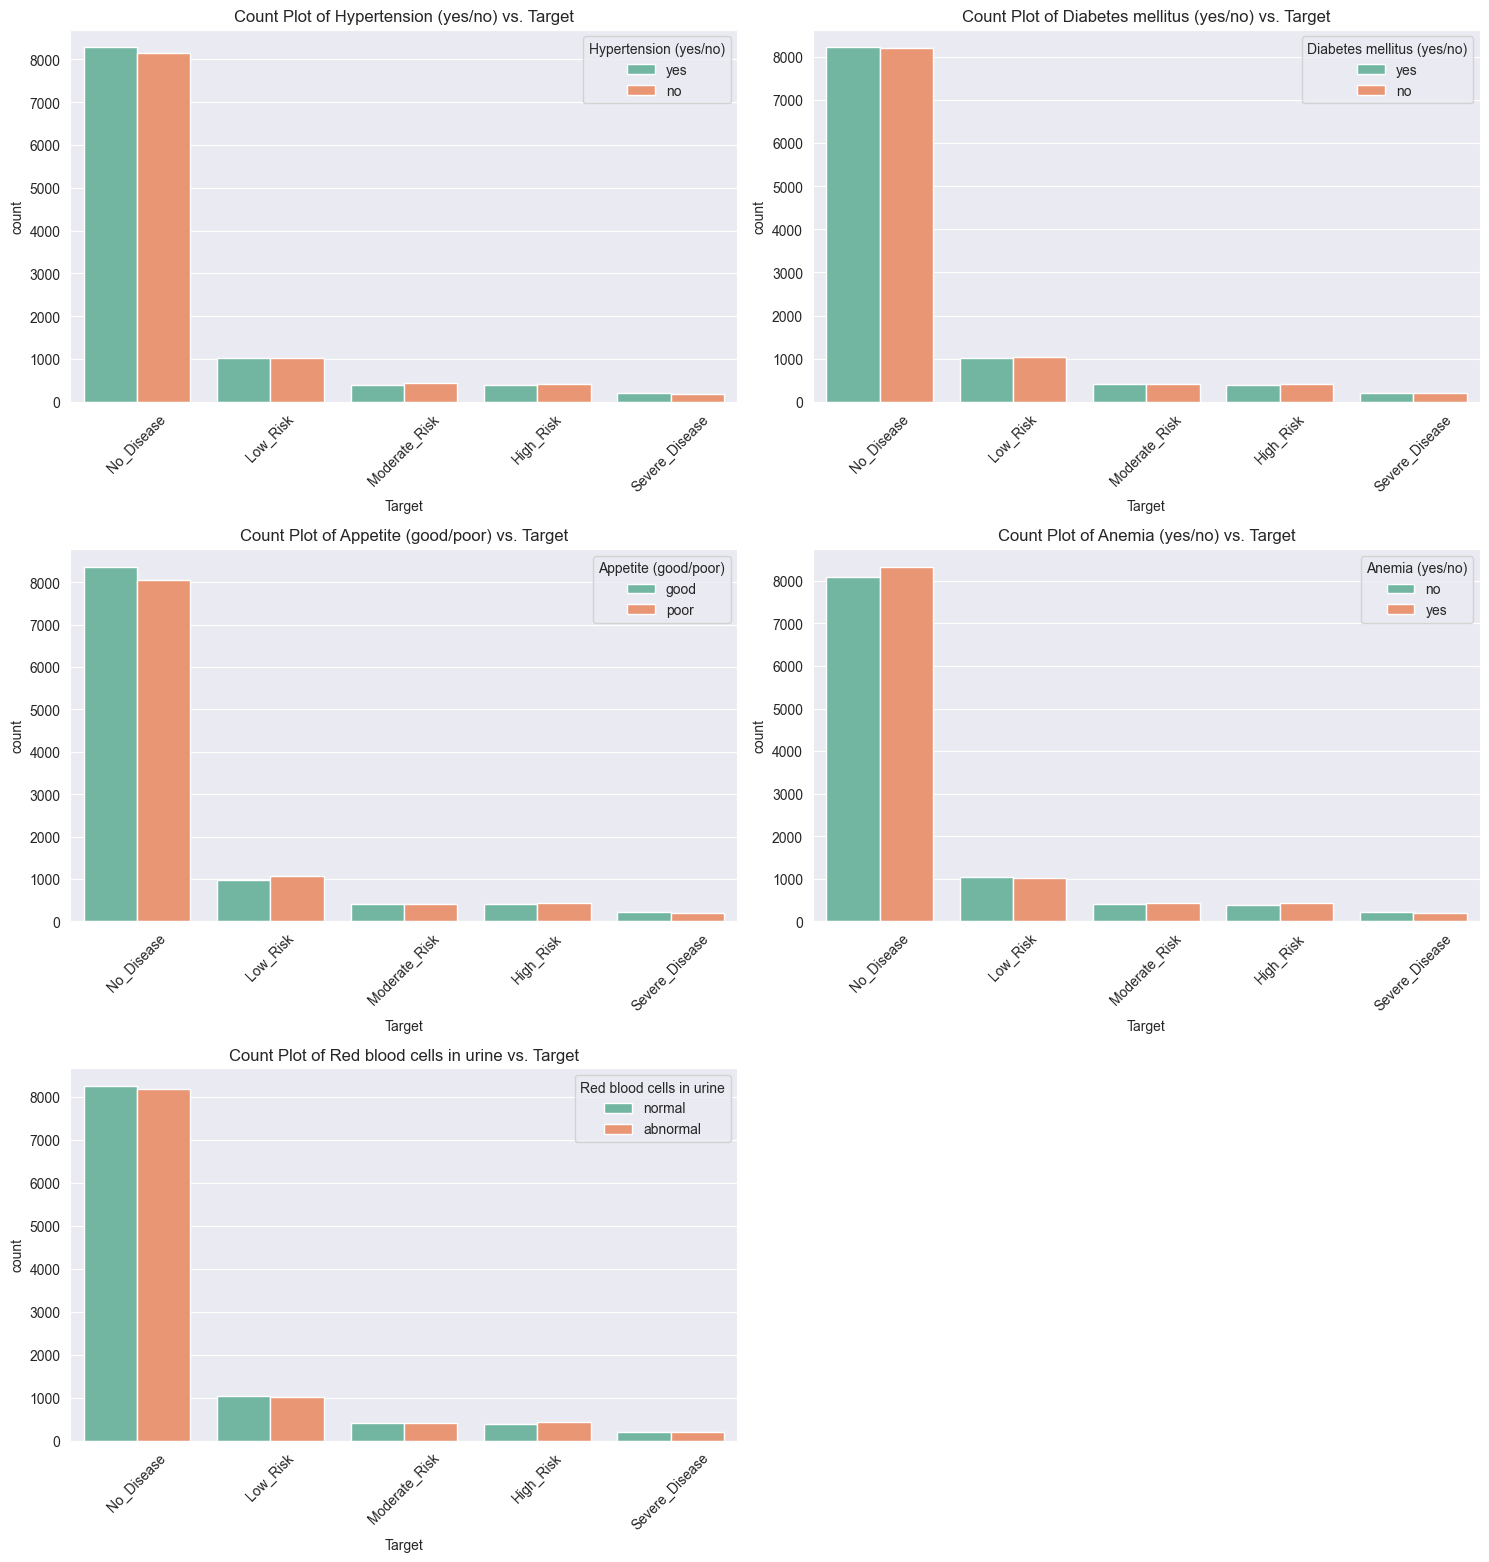

In [7]:
# Categorical Features vs. Target (Count Plots) ---

print("Step 5: Analyzing Categorical Features vs. Target")
print("--------------------------------------------------\n")

# List of key 'yes/no' or 'good/poor' style columns
categorical_features = [
    'Hypertension (yes/no)',
    'Diabetes mellitus (yes/no)',
    'Appetite (good/poor)',
    'Anemia (yes/no)',
    'Red blood cells in urine' # This has 'normal'/'abnormal'
]

# Set the order for our Target categories on the x-axis
target_order = ['No_Disease', 'Low_Risk', 'Moderate_Risk', 'High_Risk', 'Severe_Disease']

plt.figure(figsize=(15, 25))

for i, col in enumerate(categorical_features):
    
    # Create a subplot in our grid
    plt.subplot(len(categorical_features), 2, i + 1)
    
    # Create the count plot
    sns.countplot(x='Target', hue=col, data=data, order=target_order, palette='Set2')
    
    plt.title(f'Count Plot of {col} vs. Target')
    
    plt.xticks(rotation=45)

# Make sure plots don't overlap
plt.tight_layout()

plt.show()

In [8]:
# Preprocessing & Splitting ---

print("Step 7: Safe Preprocessing & Model Setup")
print("-------------------------------------------\n")

# --- 1. Separate Features (X) and Target (y) from ORIGINAL data ---
print("Separating X (features) and y (target) from original 'data'...")

X = data.drop('Target', axis=1)

y_original = data['Target']




Step 7: Safe Preprocessing & Model Setup
-------------------------------------------

Separating X (features) and y (target) from original 'data'...


In [9]:
# --- 2. Create the Binary Target (y) ---
print("Mapping 5 target classes to 2 (binary)...")
target_map = {
    'No_Disease': 0,
    'Low_Risk': 1,
    'Moderate_Risk': 1,
    'High_Risk': 1,
    'Severe_Disease': 1
}
# This is our final, clean 'y' variable
y = y_original.map(target_map)

print(f"New 'y' variable created with {len(y)} entries.")
print(y.value_counts())
print("\n")


Mapping 5 target classes to 2 (binary)...
New 'y' variable created with 20538 entries.
Target
0    16432
1     4106
Name: count, dtype: int64




In [10]:
# --- 3. Preprocess the Features (X) ---
print("Converting all text features in X to numbers...")

# We will use .replace() on our feature dataframe 'X'
binary_map = {
    # Yes/No features
    'yes': 1, 'no': 0,
    
    # Good/Poor features
    'good': 1, 'poor': 0,
    
    # Normal/Abnormal features
    'normal': 1, 'abnormal': 0,
    
    # Present/Not Present features
    'present': 1, 'not present': 0,
    
    # Smoking (a 3-value feature)
    'former': 1, 'yes': 2, 
    
    # Urinary sediment
    # 'normal' and 'abnormal' are already mapped
}

# Apply the main mapping
# We create a new 'X_processed' to be safe
X_processed = X.replace(binary_map)

Converting all text features in X to numbers...


C:\Users\HP\AppData\Local\Temp\ipykernel_8152\150790216.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_processed = X.replace(binary_map)


In [11]:
# --- 4. Fix the Typo ('moderate' and 'low'/'high') ---
print("Fixing 'Physical activity level' column...")

activity_map = {
    'low': 0,
    'moderate': 1, 
    'high': 2
}
X_processed['Physical activity level'] = X_processed['Physical activity level'].replace(activity_map)

print("All features are now 100% numerical.")


# --- 5. Final Check ---
print("\n--- Final Check (X_processed.info()) ---")
X_processed.info()

Fixing 'Physical activity level' column...
All features are now 100% numerical.

--- Final Check (X_processed.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  int64  
 6   Pus cells in urine                           20538 non-null  int64  
 7   Pus cell clumps in urine                     20538 non-null  int64  
 8   Bacteria in urine       

C:\Users\HP\AppData\Local\Temp\ipykernel_8152\162363667.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_processed['Physical activity level'] = X_processed['Physical activity level'].replace(activity_map)


In [12]:
#Feature Selection (Random Forest Importance) ---

print("Step 8: Feature Selection with Random Forest")
print("----------------------------------------------\n")
print("Training a temporary Random Forest to rank all 42 features...")
print("(This may take a moment)")

from sklearn.ensemble import RandomForestClassifier

# --- 1. Create and Train the Model ---
# We create a model to find the best features

feature_model = RandomForestClassifier(n_estimators=100, 
                                       class_weight='balanced', 
                                       random_state=42, 
                                       n_jobs=-1)

feature_model.fit(X_processed, y)

print("Model training complete.")
    


Step 8: Feature Selection with Random Forest
----------------------------------------------

Training a temporary Random Forest to rank all 42 features...
(This may take a moment)
Model training complete.


In [13]:
# --- 2. Get and Format the Feature Importances ---
# .feature_importances_ gives us an array of scores
importances = feature_model.feature_importances_

# We'll put them into a DataFrame to make them easy to read
# We match the scores with their column names
feature_importance_df = pd.DataFrame({
    'Feature': X_processed.columns,
    'Importance': importances
})

# Sort the DataFrame to see the most important features at the top
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)





--- Top 15 Most Important Features ---
                                        Feature  Importance
12                         Sodium level (mEq/L)    0.038799
24  Estimated Glomerular Filtration Rate (eGFR)    0.038764
10                           Blood urea (mg/dl)    0.038589
13                      Potassium level (mEq/L)    0.038504
26                        Urine output (ml/day)    0.037773
16          White blood cell count (cells/cumm)    0.037416
11                     Serum creatinine (mg/dl)    0.037409
40               C-reactive protein (CRP) level    0.037298
41                   Interleukin-6 (IL-6) level    0.037084
29              Parathyroid hormone (PTH) level    0.036740
27                          Serum albumin level    0.036107
25            Urine protein-to-creatinine ratio    0.036016
30                          Serum calcium level    0.035848
9            Random blood glucose level (mg/dl)    0.035811
38                             Cystatin C level    0.035769


C:\Users\HP\AppData\Local\Temp\ipykernel_8152\1640987320.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',


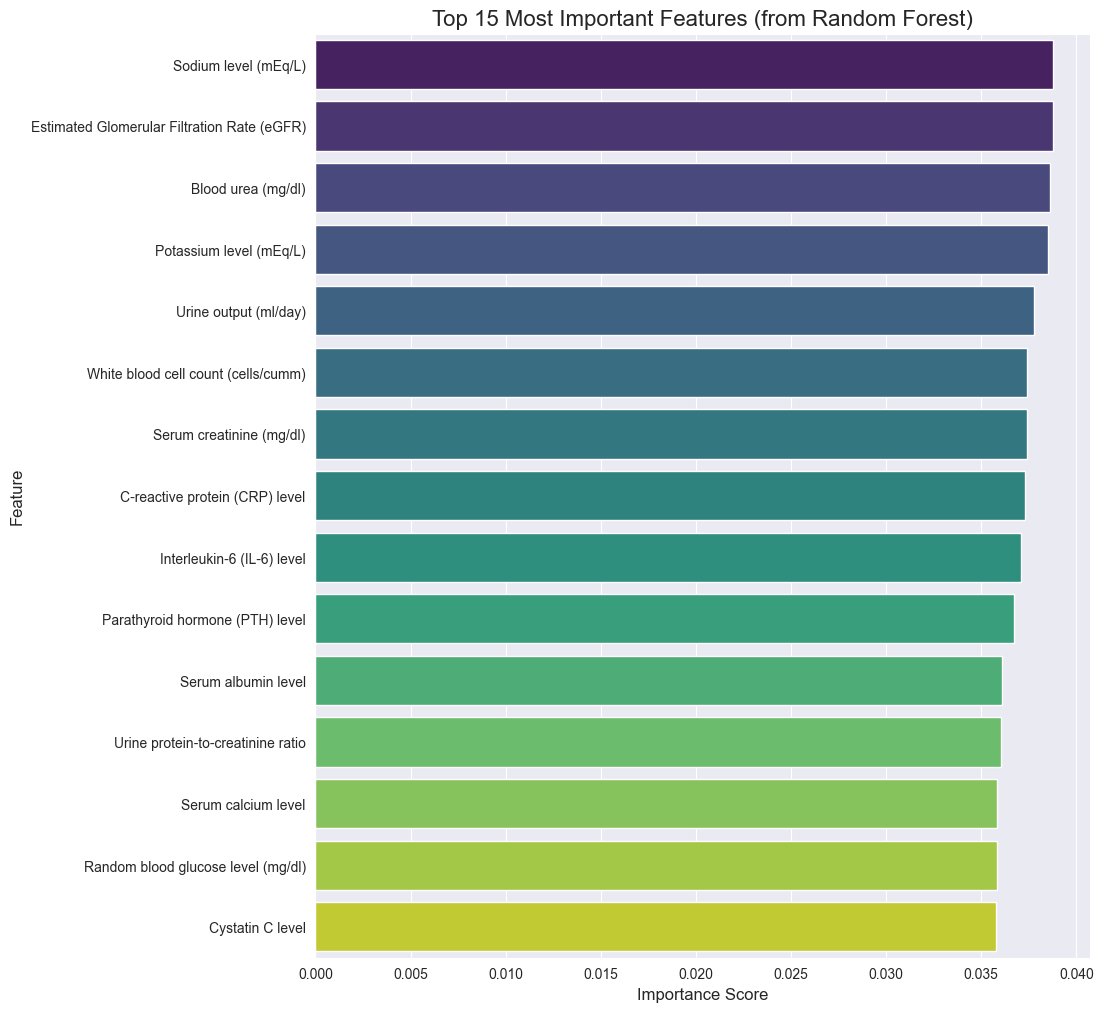

In [14]:
# --- 3. Print and Plot the Results ---
print("\n--- Top 15 Most Important Features ---")
print(feature_importance_df.head(15))


print("\nPlotting the Top 15 features...")
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', 
            y='Feature', 
            data=feature_importance_df.head(15), 
            palette='viridis') 
plt.title('Top 15 Most Important Features (from Random Forest)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [15]:
# Create Final Feature Set and Split Data ---

print("Step 9: Final Feature Selection and Data Splitting")
print("--------------------------------------------------\n")

from sklearn.model_selection import train_test_split

# --- 1. Create our list of the Top 15 features ---
# (I copied this directly from your text output)
top_15_features = [
    'Sodium level (mEq/L)',
    'Estimated Glomerular Filtration Rate (eGFR)',
    'Blood urea (mg/dl)',
    'Potassium level (mEq/L)',
    'Urine output (ml/day)',
    'White blood cell count (cells/cumm)',
    'Serum creatinine (mg/dl)',
    'C-reactive protein (CRP) level',
    'Interleukin-6 (IL-6) level',
    'Parathyroid hormone (PTH) level',
    'Serum albumin level',
    'Urine protein-to-creatinine ratio',
    'Serum calcium level',
    'Random blood glucose level (mg/dl)',
    'Cystatin C level'
]



Step 9: Final Feature Selection and Data Splitting
--------------------------------------------------



In [16]:
# --- 2. Create our final 'X_final' DataFrame ---
X_final = X_processed[top_15_features]

print(f"Created final feature set with {X_final.shape[1]} columns.\n")

# --- 3. Split the data into Training and Testing sets ---

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Data successfully split into training and testing sets.")
print(f"Training data (X_train) shape: {X_train.shape}")
print(f"Testing data (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape: {y_train.shape}")
print(f"Testing target (y_test) shape: {y_test.shape}")

Created final feature set with 15 columns.

Data successfully split into training and testing sets.
Training data (X_train) shape: (16430, 15)
Testing data (X_test) shape: (4108, 15)
Training target (y_train) shape: (16430,)
Testing target (y_test) shape: (4108,)


In [17]:
# --- Cell 10: Feature Scaling and Model Training ---

print("Step 10: Scaling Features and Training Models")
print("-----------------------------------------------\n")

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- 1. Feature Scaling ---
print("Scaling data...")

# Create the StandardScaler object
scaler = StandardScaler()


scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully.")



Step 10: Scaling Features and Training Models
-----------------------------------------------

Scaling data...
Data scaled successfully.


In [18]:
# --- 2. Train Model 1: Logistic Regression ---
print("Training Logistic Regression model...")

# We create the model
# We use 'class_weight=balanced' again to handle the imbalance
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# We train it on the SCALED training data
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression trained.")



Training Logistic Regression model...
Logistic Regression trained.


In [19]:
# --- 3. Train Model 2: Random Forest Classifier ---
print("Training Random Forest model...")

# We create the model
rf_model = RandomForestClassifier(n_estimators=100, 
                                  class_weight='balanced', 
                                  random_state=42, 
                                  n_jobs=-1)

# We train it on the ORIGINAL (non-scaled) training data.
# Random Forest does not need scaled data, so it's better to use the original.
rf_model.fit(X_train, y_train)

print("Random Forest trained.")
print("\n--- All models are trained and ready for evaluation! ---")

Training Random Forest model...
Random Forest trained.

--- All models are trained and ready for evaluation! ---


In [20]:
#  Evaluate Model Performance ---

print("Step 11: Evaluating Our Models")
print("---------------------------------\n")

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score
)

# --- 1. Get Predictions ---
print("Making predictions on the test data...")

# Logistic Regression uses the SCALED test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Random Forest uses the ORIGINAL (non-scaled) test data
y_pred_rf = rf_model.predict(X_test)

print("Predictions complete.\n")




Step 11: Evaluating Our Models
---------------------------------

Making predictions on the test data...
Predictions complete.



--- Evaluation: Logistic Regression ---
Accuracy: 0.4917

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.79      0.50      0.61      3287
   Disease (1)       0.19      0.46      0.27       821

      accuracy                           0.49      4108
     macro avg       0.49      0.48      0.44      4108
  weighted avg       0.67      0.49      0.54      4108


Confusion Matrix:


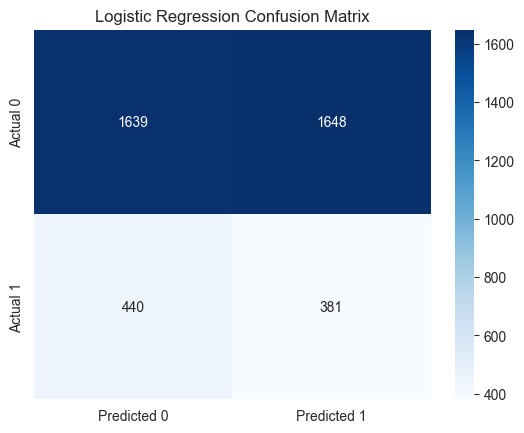

In [21]:
# --- 2. Evaluate Model 1: Logistic Regression ---
print("--- Evaluation: Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}") # Format to 4 decimal places

# Print the detailed report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['No Disease (0)', 'Disease (1)']))

# Print the Confusion Matrix
print("\nConfusion Matrix:")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()






--- Evaluation: Random Forest ---
Accuracy: 0.8001

Classification Report:
                precision    recall  f1-score   support

No Disease (0)       0.80      1.00      0.89      3287
   Disease (1)       0.00      0.00      0.00       821

      accuracy                           0.80      4108
     macro avg       0.40      0.50      0.44      4108
  weighted avg       0.64      0.80      0.71      4108


Confusion Matrix:


c:\Users\HP\miniconda3\envs\kidney_project\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\miniconda3\envs\kidney_project\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\miniconda3\envs\kidney_project\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

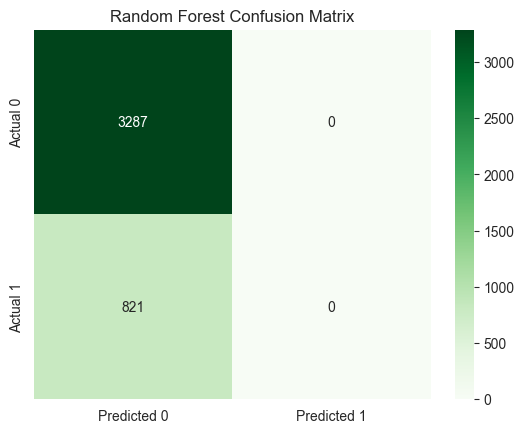

In [22]:
# --- 3. Evaluate Model 2: Random Forest ---
print("\n\n--- Evaluation: Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Print the detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Disease (0)', 'Disease (1)']))

# Print the Confusion Matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.show()

In [23]:
%pip install imbalanced-learn --quiet

# --- Cell 12: Fix Imbalance with SMOTE and Re-Evaluate ---

print("Step 12: Fixing Imbalance with SMOTE")
print("-------------------------------------------\n")

# We import SMOTE from the 'imbalanced-learn' library

from imblearn.over_sampling import SMOTE


Note: you may need to restart the kernel to use updated packages.
Step 12: Fixing Imbalance with SMOTE
-------------------------------------------



In [24]:
# --- Cell 12: Fix Imbalance with SMOTE and Re-Evaluate ---

print("Step 12: Fixing Imbalance with SMOTE")
print("-------------------------------------------\n")

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- 1. Apply SMOTE ---

smote = SMOTE(random_state=42)

print("Applying SMOTE to (non-scaled) training data for Random Forest...")
# We fit/resample on the non-scaled data for the Random Forest
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Applying SMOTE to (scaled) training data for Logistic Regression...")
# We fit/resample on the SCALED data for Logistic Regression
X_train_scaled_smote, y_train_scaled_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nSMOTE complete. Our new training sets are 50/50 balanced.")
print(f"Old y_train counts:\n{y_train.value_counts()}")
print(f"New y_train_smote counts:\n{y_train_smote.value_counts()}")
print("\n")




Step 12: Fixing Imbalance with SMOTE
-------------------------------------------

Applying SMOTE to (non-scaled) training data for Random Forest...
Applying SMOTE to (scaled) training data for Logistic Regression...

SMOTE complete. Our new training sets are 50/50 balanced.
Old y_train counts:
Target
0    13145
1     3285
Name: count, dtype: int64
New y_train_smote counts:
Target
0    13145
1    13145
Name: count, dtype: int64




In [25]:
# --- 2. Re-Train Model 1: Logistic Regression ---
print("Re-training Logistic Regression on SMOTE data...")
# We create a new model, but this time we DON'T need 'class_weight=balanced'
# because the data is already balanced.
log_reg_smote = LogisticRegression(random_state=42)
log_reg_smote.fit(X_train_scaled_smote, y_train_scaled_smote)
print("Logistic Regression re-trained.")


# --- 3. Re-Train Model 2: Random Forest ---
print("Re-training Random Forest on SMOTE data...")
# We create a new model, also without 'class_weight'
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_smote.fit(X_train_smote, y_train_smote)
print("Random Forest re-trained.")



Re-training Logistic Regression on SMOTE data...
Logistic Regression re-trained.
Re-training Random Forest on SMOTE data...
Random Forest re-trained.


In [26]:

# --- 4. Re-Evaluate on the ORIGINAL, UNBALANCED Test Set ---
# This is critical. We test on data that looks like the real world.
print("\n\n--- Evaluation: Logistic Regression (with SMOTE) ---")
y_pred_log_reg_smote = log_reg_smote.predict(X_test_scaled) # Use original scaled test data
print(classification_report(y_test, y_pred_log_reg_smote, target_names=['No Disease (0)', 'Disease (1)']))


print("\n\n--- Evaluation: Random Forest (with SMOTE) ---")
y_pred_rf_smote = rf_model_smote.predict(X_test) # Use original non-scaled test data
print(classification_report(y_test, y_pred_rf_smote, target_names=['No Disease (0)', 'Disease (1)']))



--- Evaluation: Logistic Regression (with SMOTE) ---
                precision    recall  f1-score   support

No Disease (0)       0.79      0.51      0.62      3287
   Disease (1)       0.19      0.46      0.27       821

      accuracy                           0.50      4108
     macro avg       0.49      0.48      0.44      4108
  weighted avg       0.67      0.50      0.55      4108



--- Evaluation: Random Forest (with SMOTE) ---
                precision    recall  f1-score   support

No Disease (0)       0.80      0.86      0.83      3287
   Disease (1)       0.22      0.15      0.18       821

      accuracy                           0.72      4108
     macro avg       0.51      0.51      0.50      4108
  weighted avg       0.69      0.72      0.70      4108



In [ ]:
# --- Cell 13: Save Model for Deployment ---

print("Step 13: Saving the final model for deployment")
print("------------------------------------------------\n")

import joblib
import json

# --- 1. Define our final model and features ---

# This is the model we chose as our "best"
final_model = rf_model_smote 

# This is the list of 15 features the model was trained on
final_features = top_15_features 

# --- 2. Save the model to a file ---
model_filename = 'kidney_model.joblib'
joblib.dump(final_model, model_filename)

print(f"Success! Model saved to: {model_filename}")


# --- 3. Save the feature list to a file ---
feature_filename = 'model_features.json'
with open(feature_filename, 'w') as f:
    json.dump(final_features, f)

print(f"Success! Feature list saved to: {feature_filename}")

print("\nYour notebook work is complete!")
print("You are now ready to build the Streamlit app.")

Step 13: Saving the final model for deployment
------------------------------------------------

Success! Model saved to: kidney_model.joblib
Success! Feature list saved to: model_features.json

Your notebook work is complete!
You are now ready to build the Streamlit app.
